#**TP_FINAL - COMISIÓN 1**

##Carga de librerias

In [ ]:
!pip install --upgrade patsy


In [ ]:
#Conectamos con google drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
pd.set_option("display.max_columns", 500)

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

#PARTE 1

El tema para analizar es un dataset de Franquicias cinematográficas. La idea principal es determinar la calificación promedio de las películas por medio de las variables disponibles. En si el fin es llegar a la conclusión de que tan bien puede ser estimada la misma.

La fuente del Dataset es la pagina llamada data.world, posee datasets de diferente indole con datos mundiales.
Esta pagina va a ser la fuente de nuestro dataset [https://data.world/abbyc01/moviefranchises]

En esta etapa se realizará el análisis exploratorio de las variables de interés, medidas de resumen y visualización. Por ejemplo, distribución de las variables, correlación entre las mismas, tabulaciones cruzadas, etc



##Carga del Dataset

In [ ]:
dfbd = pd.read_excel("/content/drive/MyDrive/FCD/TP_FINAL/MovieFranchises.xlsx", skiprows=0)

dfbd

,MovieID,Title,Lifetime Gross,Year,Studio,Rating,Runtime,Budget,ReleaseDate,VoteAvg,VoteCount,FranchiseID
0,1001,Star Wars: Episode IV - A New Hope,775398007,1977,Lucasfilm,PG,121,11000000,1977-05-25,4.09,96233,101
1,1002,Star Wars: Episode V - The Empire Strikes Back,538375067,1980,Lucasfilm,PG,124,18000000,1980-06-20,4.12,79231,101
2,1003,Star Wars: Episode VI - Return of the Jedi,475106177,1983,Lucasfilm,PG,135,32500000,1983-05-25,3.98,76082,101
3,1004,Jurassic Park,1109802321,1993,Universal Pictures,PG-13,127,63000000,1993-06-11,3.69,82700,102
4,1005,The Lost World: Jurassic Park,618638999,1997,Universal Pictures,PG-13,129,73000000,1997-05-23,3.01,19721,102
5,1006,Star Wars: Episode I - The Phantom Menace,1027082707,1999,Lucasfilm,PG,136,115000000,1999-05-19,3.08,40945,101
6,1007,Jurassic Park III,368780809,2001,Universal Pictures,PG-13,92,93000000,2001-07-18,2.73,11927,102
7,1008,Harry Potter and the Sorcerer's Stone,1022290019,2001,Warner Bros.,PG,152,125000000,2001-11-16,3.69,35511,103
8,1009,The Lord of the Rings: The Fellowship of the Ring,898094742,2001,WingNut Films,PG-13,179,93000000,2001-12-18,4.10,78562,104
9,1010,Star Wars: Episode II - Attack of the Clones,653779970,2002,Lucasfilm,PG,142,120000000,2002-05-15,3.03,28066,101


Se realizará una unión con la hoja de género que estaba separada de la parte de datos principal

In [ ]:
dfg = pd.read_excel("/content/drive/MyDrive/FCD/TP_FINAL/MovieFranchises.xlsx", skiprows=0, sheet_name = 'moviegenre')

dfg

,MovieGenreID,MovieID,Genre
0,1001,1001,Action
1,1002,1001,Adventure
2,1003,1001,Sci-Fi
3,1004,1002,Action
4,1005,1002,Adventure
...,...,...,...
176,1177,1059,Adventure
177,1178,1059,Sci-Fi
178,1179,1060,Fantasy
179,1180,1060,Action


Pero antes se agrupará por MovieID los distintos géneros, pero antes se los ordenará en orden alfabético para que luego sean comparables los géneros en forma agrupada.

In [ ]:
dfg.sort_values(by='Genre')

,MovieGenreID,MovieID,Genre
0,1001,1001,Action
159,1160,1053,Action
33,1034,1012,Action
67,1068,1025,Action
36,1037,1013,Action
...,...,...,...
147,1148,1049,Sci-Fi
90,1091,1032,Sci-Fi
144,1145,1048,Thriller
100,1101,1035,Thriller


In [ ]:
dfgm = dfg.sort_values(by='Genre').groupby('MovieID')['Genre'].apply(lambda x: '_'.join(x)).reset_index()

dfgm

,MovieID,Genre
0,1001,Action_Adventure_Sci-Fi
1,1002,Action_Adventure_Sci-Fi
2,1003,Action_Adventure_Sci-Fi
3,1004,Adventure_Sci-Fi
4,1005,Action_Adventure_Sci-Fi
5,1006,Action_Adventure_Sci-Fi
6,1007,Action_Adventure_Sci-Fi_Thriller
7,1008,Adventure_Fantasy
8,1009,Action_Adventure_Fantasy
9,1010,Action_Adventure_Sci-Fi


Ahora se realizará la unión de los dos data frame.

In [ ]:
df = pd.merge(dfbd, dfgm, on='MovieID', how='left')

df

,MovieID,Title,Lifetime Gross,Year,Studio,Rating,Runtime,Budget,ReleaseDate,VoteAvg,VoteCount,FranchiseID,Genre
0,1001,Star Wars: Episode IV - A New Hope,775398007,1977,Lucasfilm,PG,121,11000000,1977-05-25,4.09,96233,101,Action_Adventure_Sci-Fi
1,1002,Star Wars: Episode V - The Empire Strikes Back,538375067,1980,Lucasfilm,PG,124,18000000,1980-06-20,4.12,79231,101,Action_Adventure_Sci-Fi
2,1003,Star Wars: Episode VI - Return of the Jedi,475106177,1983,Lucasfilm,PG,135,32500000,1983-05-25,3.98,76082,101,Action_Adventure_Sci-Fi
3,1004,Jurassic Park,1109802321,1993,Universal Pictures,PG-13,127,63000000,1993-06-11,3.69,82700,102,Adventure_Sci-Fi
4,1005,The Lost World: Jurassic Park,618638999,1997,Universal Pictures,PG-13,129,73000000,1997-05-23,3.01,19721,102,Action_Adventure_Sci-Fi
5,1006,Star Wars: Episode I - The Phantom Menace,1027082707,1999,Lucasfilm,PG,136,115000000,1999-05-19,3.08,40945,101,Action_Adventure_Sci-Fi
6,1007,Jurassic Park III,368780809,2001,Universal Pictures,PG-13,92,93000000,2001-07-18,2.73,11927,102,Action_Adventure_Sci-Fi_Thriller
7,1008,Harry Potter and the Sorcerer's Stone,1022290019,2001,Warner Bros.,PG,152,125000000,2001-11-16,3.69,35511,103,Adventure_Fantasy
8,1009,The Lord of the Rings: The Fellowship of the Ring,898094742,2001,WingNut Films,PG-13,179,93000000,2001-12-18,4.10,78562,104,Action_Adventure_Fantasy
9,1010,Star Wars: Episode II - Attack of the Clones,653779970,2002,Lucasfilm,PG,142,120000000,2002-05-15,3.03,28066,101,Action_Adventure_Sci-Fi


##Tareas de limpieza y transformación de los datos

###Modificación de los nombres de las columnas y formato de los datos para un correcto desarrollo de codificación

In [ ]:
columnas_m = list(map(lambda x: x.lower().replace(" ", "_").replace("(", "").replace(")", ""), df.columns.tolist()))
columnas_df = df.columns.tolist()

nombre_columnas = dict(zip(columnas_df, columnas_m))

df.rename(columns = nombre_columnas, inplace = True)

df

,movieid,title,lifetime_gross,year,studio,rating,runtime,budget,releasedate,voteavg,votecount,franchiseid,genre
0,1001,Star Wars: Episode IV - A New Hope,775398007,1977,Lucasfilm,PG,121,11000000,1977-05-25,4.09,96233,101,Action_Adventure_Sci-Fi
1,1002,Star Wars: Episode V - The Empire Strikes Back,538375067,1980,Lucasfilm,PG,124,18000000,1980-06-20,4.12,79231,101,Action_Adventure_Sci-Fi
2,1003,Star Wars: Episode VI - Return of the Jedi,475106177,1983,Lucasfilm,PG,135,32500000,1983-05-25,3.98,76082,101,Action_Adventure_Sci-Fi
3,1004,Jurassic Park,1109802321,1993,Universal Pictures,PG-13,127,63000000,1993-06-11,3.69,82700,102,Adventure_Sci-Fi
4,1005,The Lost World: Jurassic Park,618638999,1997,Universal Pictures,PG-13,129,73000000,1997-05-23,3.01,19721,102,Action_Adventure_Sci-Fi
5,1006,Star Wars: Episode I - The Phantom Menace,1027082707,1999,Lucasfilm,PG,136,115000000,1999-05-19,3.08,40945,101,Action_Adventure_Sci-Fi
6,1007,Jurassic Park III,368780809,2001,Universal Pictures,PG-13,92,93000000,2001-07-18,2.73,11927,102,Action_Adventure_Sci-Fi_Thriller
7,1008,Harry Potter and the Sorcerer's Stone,1022290019,2001,Warner Bros.,PG,152,125000000,2001-11-16,3.69,35511,103,Adventure_Fantasy
8,1009,The Lord of the Rings: The Fellowship of the Ring,898094742,2001,WingNut Films,PG-13,179,93000000,2001-12-18,4.10,78562,104,Action_Adventure_Fantasy
9,1010,Star Wars: Episode II - Attack of the Clones,653779970,2002,Lucasfilm,PG,142,120000000,2002-05-15,3.03,28066,101,Action_Adventure_Sci-Fi


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   movieid         60 non-null     int64         
 1   title           60 non-null     object        
 2   lifetime_gross  60 non-null     int64         
 3   year            60 non-null     int64         
 4   studio          60 non-null     object        
 5   rating          60 non-null     object        
 6   runtime         60 non-null     int64         
 7   budget          60 non-null     int64         
 8   releasedate     60 non-null     datetime64[ns]
 9   voteavg         60 non-null     float64       
 10  votecount       60 non-null     int64         
 11  franchiseid     60 non-null     int64         
 12  genre           60 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(7), object(4)
memory usage: 6.6+ KB


###Tratamiento de NaNs

Se procede a observar la cantidad de NaNs por columna y valores vacíos

In [ ]:
df.isna().sum()

movieid           0
title             0
lifetime_gross    0
year              0
studio            0
rating            0
runtime           0
budget            0
releasedate       0
voteavg           0
votecount         0
franchiseid       0
genre             0
dtype: int64

In [ ]:
df.isnull().sum()

movieid           0
title             0
lifetime_gross    0
year              0
studio            0
rating            0
runtime           0
budget            0
releasedate       0
voteavg           0
votecount         0
franchiseid       0
genre             0
dtype: int64

No se encontraron valores nulos, ni tampoco NaNs

###Identificación de valores anomalos

In [ ]:
df.describe()

,movieid,lifetime_gross,year,runtime,budget,voteavg,votecount,franchiseid
count,60.000000,6.000000e+01,60.000000,60.000000,6.000000e+01,60.000000,60.000000,60.000000
mean,1030.500000,9.583195e+08,2010.616667,137.983333,1.752417e+08,3.556000,21722.266667,103.600000
std,17.464249,4.663413e+08,10.010320,19.022281,7.568151e+07,0.361359,23551.977668,1.596607
min,1001.000000,2.647710e+08,1977.000000,92.000000,1.100000e+07,2.640000,238.000000,101.000000
25%,1015.750000,6.395707e+08,2005.000000,125.500000,1.287500e+08,3.305000,8186.250000,102.000000
50%,1030.500000,9.162889e+08,2013.500000,135.000000,1.700000e+08,3.645000,13226.500000,104.000000
75%,1045.250000,1.129329e+09,2018.000000,147.000000,2.050000e+08,3.822500,26603.750000,105.000000
max,1060.000000,2.797501e+09,2022.000000,201.000000,4.000000e+08,4.120000,96233.000000,105.000000


Observando el promedio, el desvío estándar, máximos y mínimos; no se identifica valores ilógicos, anomalos o posibles atípicos de análisis.

##Exploración de cada variable y posibles relaciones entre ellas, mediante tecnicas de visualización y estadística descriptiva

**Para empezar se exploraran alguna variables en forma agrupada o en proporción para contemplar una mejor idea de la distribución de los datos.**

### Proporción de películas estrenadas según estudio cinematográfico - %

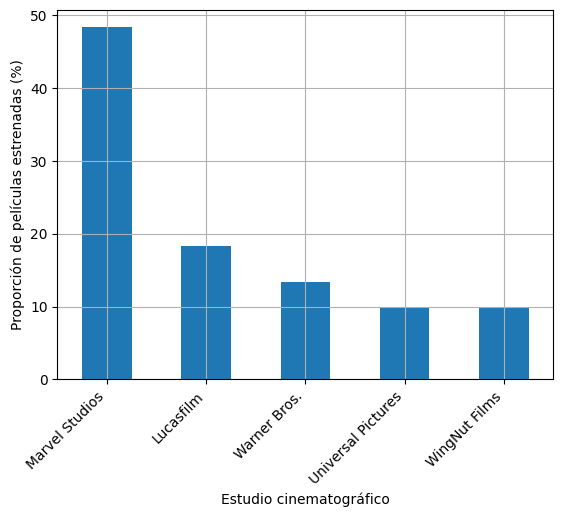

In [ ]:

_ = (df.studio.value_counts(normalize = True)*100).round(2).plot.bar(grid = True, ylabel = "Proporción de películas estrenadas (%)", xlabel = "Estudio cinematográfico")

# Personalizar las etiquetas del eje x
_ = plt.xticks(rotation=45, ha='right')

Se observa que aproximadamente el 50% de las peliculas corresponden al estudio de Marvel Studios y los demas estudios representan una proporción menor al 20% cada uno.

### Proporción de películas estrenadas según grupo de genero - %

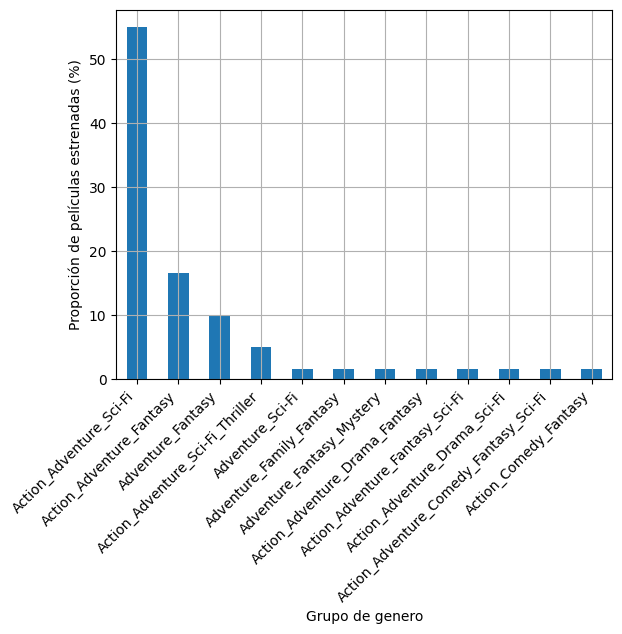

In [ ]:
ax = (df.genre.value_counts(normalize = True)*100).round(2).plot.bar(grid = True, ylabel = "Proporción de películas estrenadas (%)", xlabel = "Grupo de genero")

# Personalizar las etiquetas del eje x
_ = plt.xticks(rotation=45, ha='right')

También se observa que aproximadamente el 50% de las peliculas corresponden al genero Action_Adventure_Sci-Fi y los demas generos representan una proporción menor al 20% cada uno.

Se observara una tabulación cruzada con respecto al estudio cinematografico, en particular para estudiar ese 50% como esta distribuido el grupo genero entre los estudios. Se lo observara en proporción con todas las peliculas de la base de datos.

In [ ]:
(pd.crosstab(index=df.genre, columns=df.studio, values=df.genre, aggfunc='count')/df.shape[0]).round(2)

studio,Lucasfilm,Marvel Studios,Universal Pictures,Warner Bros.,WingNut Films
genre,,,,,
Action_Adventure_Comedy_Fantasy_Sci-Fi,NaN,0.02,NaN,NaN,NaN
Action_Adventure_Drama_Fantasy,NaN,0.02,NaN,NaN,NaN
Action_Adventure_Drama_Sci-Fi,NaN,0.02,NaN,NaN,NaN
Action_Adventure_Fantasy,NaN,0.07,NaN,NaN,0.1
Action_Adventure_Fantasy_Sci-Fi,0.02,NaN,NaN,NaN,NaN
Action_Adventure_Sci-Fi,0.17,0.35,0.03,NaN,NaN
Action_Adventure_Sci-Fi_Thriller,NaN,NaN,0.05,NaN,NaN
Action_Comedy_Fantasy,NaN,0.02,NaN,NaN,NaN
Adventure_Family_Fantasy,NaN,NaN,NaN,0.02,NaN


Ese 50% se encuentra distribuido entre 3 estudios diferentes prevaleciendo un poco más Marvel Studios entre los otros dos.

En los otros casos se ve una distribución uniforme a nivel total, es decir, donde hay valores su magnitud es cercana a los otros donde hay valores.

### Distribución de la variable runtime - Histograma

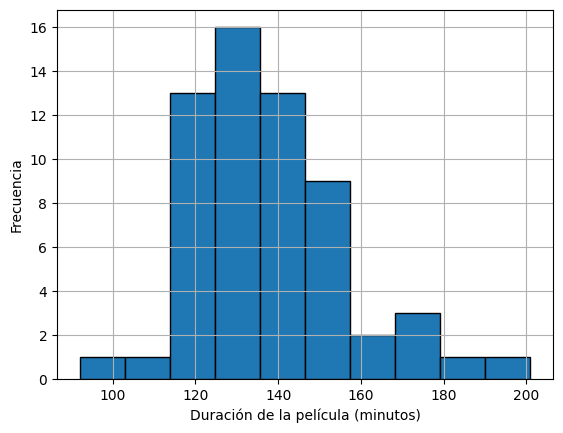

In [ ]:

_ = df.runtime.plot.hist(bins=10, edgecolor='black', grid = True)

_ = plt.xlabel("Duración de la película (minutos)")
_ = plt.ylabel("Frecuencia")

Vemos que se presenta una mayor frecuencia de peliculas con una duración dentro del intervalo de [120, 140] y para el intervalo complemento al anterior, se tienen frecuencias menores a 4 peliculas; aproximadamente tres veces menos en comparación con el primer intervalo.

### Valoración de las películas por parte de los espectadores según el estudio/tiempo de duración

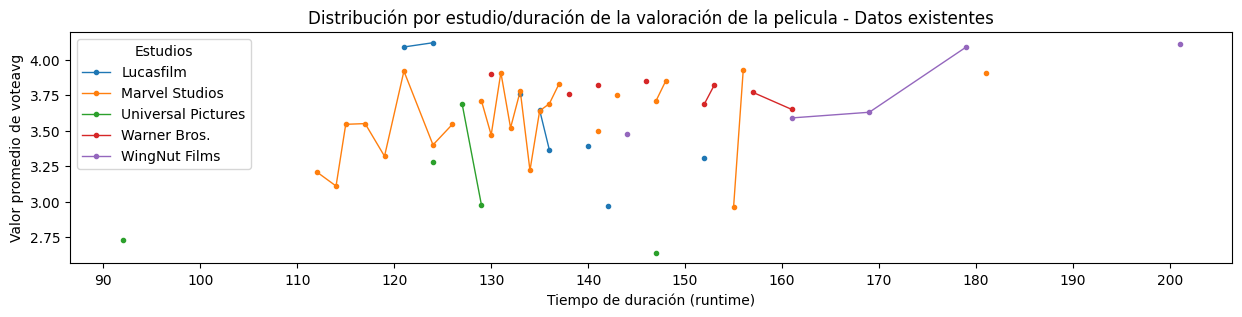

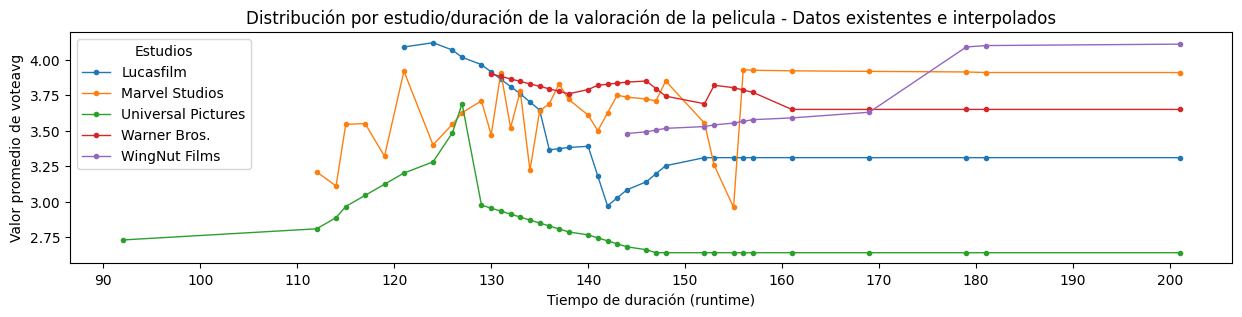

In [ ]:
#Dado que puede haber mas de una pelicula para un estudio y mismo tiempo de duración se calculara el promedio de los mismos

#Datos existentes
_ = df.groupby(['runtime', 'studio']).voteavg.mean().unstack().plot.line(marker='o', figsize = (15, 3), linewidth=1, markersize=3)

_ = plt.xlabel("Tiempo de duración (runtime)")
_ = plt.ylabel("Valor promedio de voteavg")
_ = plt.legend(title='Estudios', loc='best')
_ = plt.title("Distribución por estudio/duración de la valoración de la pelicula - Datos existentes")
_ = plt.xticks(range(90, 210, 10))

#Datos existentes e interpolados
_ = df.groupby(['runtime', 'studio']).voteavg.mean().unstack().interpolate(method='linear').plot.line(marker='o', figsize = (15, 3), linewidth=1, markersize=3)

_ = plt.xlabel("Tiempo de duración (runtime)")
_ = plt.ylabel("Valor promedio de voteavg")
_ = plt.legend(title='Estudios', loc='best')
_ = plt.title("Distribución por estudio/duración de la valoración de la pelicula - Datos existentes e interpolados")
_ = plt.xticks(range(90, 210, 10))


Warner Bros. tiende a mantener una estabilidad en sus peliculas indiferente de la duración.

Lucasfilm, mientras aumenta la duración de la pelicula decae su valoración.

Marvel Studios, presenta un comportamiento irregular y tampoco se identifica una regularidad potencial.

Universal Pictures, practicamente su valoración es baja en comparación con los demas estudios, presentando un máximo local de valoración para una duración de 127min aproximadamente.

WingNut Films, en comparación con los demas estudios tiene valoraciones alta-medias y cierta regularidad.






Observando la valoración promedio independiente de la duración

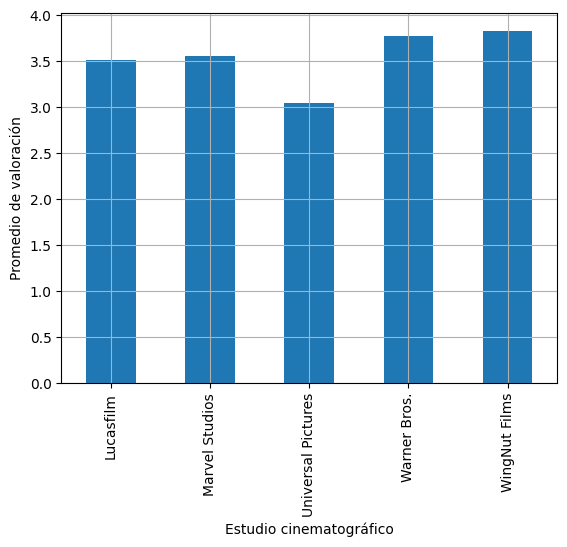

In [ ]:
_ = df.groupby("studio").voteavg.mean().round(2).plot.bar(grid = True, ylabel = "Promedio de valoración", xlabel = "Estudio cinematográfico")

Los distintos estudios guardan una valoración aproximadamente similar dentro de todo, dicha valoración es alta, por lo que son estudios de importancia en el mercado del cine y que estan aún mismo nivel entre ellos aproximadamente.

### Correlaciones de variables

**Ahora esta exploración será entorno a la variable *voteavg* (calificación promedio) que es la base de estudio para este tema a analizar**

Se observará la matriz de correlación del DataFrame

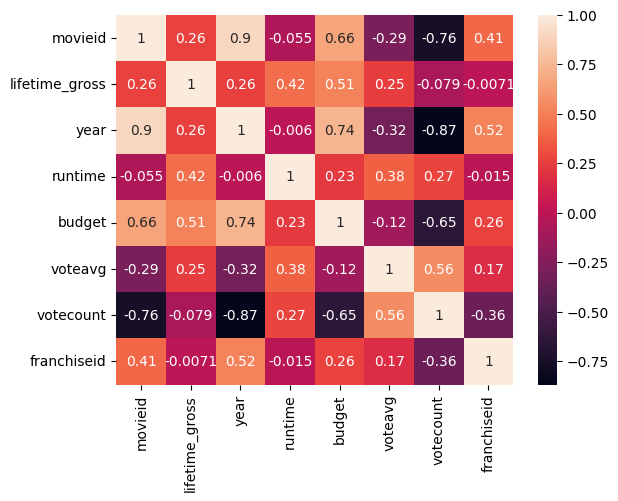

In [ ]:
_ = sns.heatmap(df[df.describe().columns].corr(), annot=True)

Observando la fila de la variable voteavg, no hay un valor apreciable de correlación con las variables runtime (0.38) y la variable budget (-0.12).
La variable lifetime_gross (recaudación total de la pelicula) y votecount (cantidad de votos) no cuentan para este análisis ya que las mismas existen en paralelismo con voteavg, es decir su valores se dan después del estreno de la película al igual que voteavg.

Si bien las variables runtime (duración) y la variable budget (presupuesto) por separado con voteavg no hay una fuerte tendencia de dependencia, puede que en conjunto la correlación sea más fuerte. Esto será un análisis para la parte 2 del TP en combinación con dos variables cualitativas que representa el estudio a cargo de la pelicula y el genero de la pelicula.

Se observara de todos modos una distribución de puntos para las variables en relación con voteavg.

####runtime vs voteavg

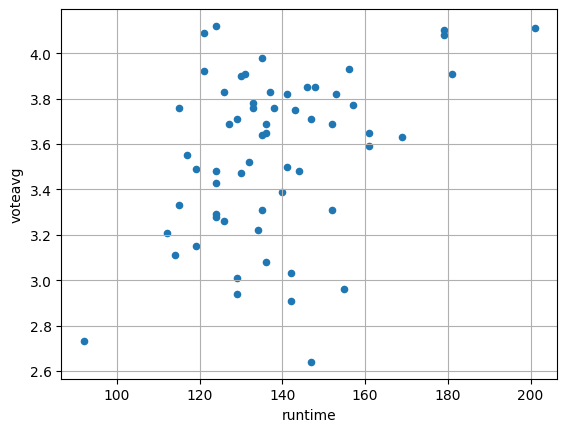

In [ ]:
_ = df.plot.scatter(x = "runtime", y = "voteavg", grid = True)

Se observa un crecimiento, pero de todos modos también hay una dispersión fuerte de los puntos

####budget vs voteavg

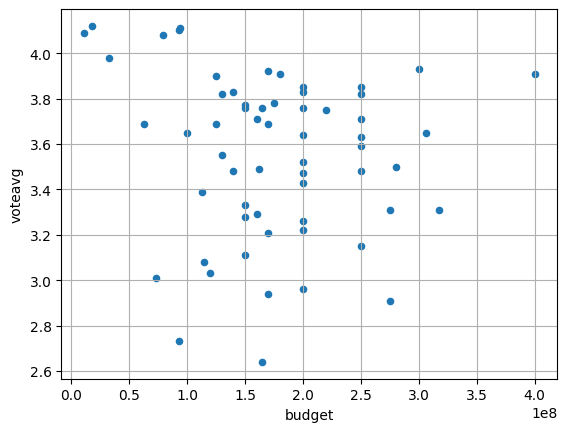

In [ ]:
_ = df.plot.scatter(x = "budget", y = "voteavg", grid = True)

Directamente hay una dispersión fuerte de los puntos

#### lifetime_gross vs voteavg

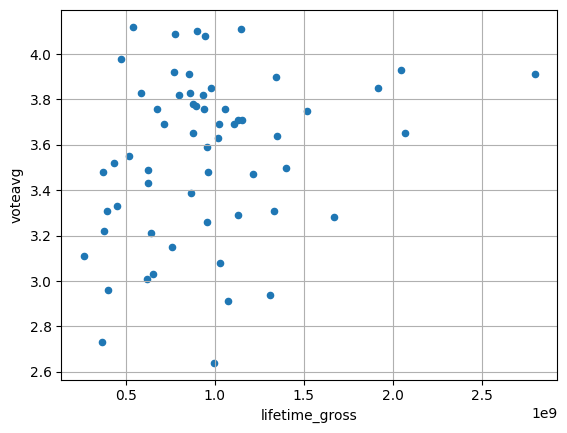

In [ ]:
_ = df.plot.scatter(x = "lifetime_gross", y = "voteavg", grid = True)

No se observa un crecimiento ni decrecimiento, hay una dispersión fuerte de los puntos

#### votecount vs voteavg

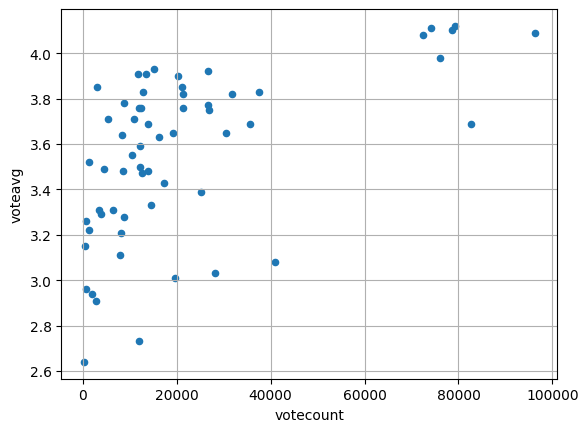

In [ ]:
_ = df.plot.scatter(x = "votecount", y = "voteavg", grid = True)

Se observa un crecimiento, pero de todos modos también hay una dispersión fuerte de los puntos

Estas dos últimas variables en el modelo de predicción no se tendran en cuenta ya que evolucionan en el tiempo, al mismo tiempo que la valoración, la idea es usar variables que permitan estimar el valor antes de que el mismo empieze a darse.

#PARTE 2

En esta parte se realizara una regresión lineal multiple para estimar la valoración de una pelicula.

Para ello se utilizara cuatro variables:

*   Presupuesto (budget)
*   Duración (runtime)
*   Estudio (studio)
*   Genero (genre)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   movieid         60 non-null     int64         
 1   title           60 non-null     object        
 2   lifetime_gross  60 non-null     int64         
 3   year            60 non-null     int64         
 4   studio          60 non-null     object        
 5   rating          60 non-null     object        
 6   runtime         60 non-null     int64         
 7   budget          60 non-null     int64         
 8   releasedate     60 non-null     datetime64[ns]
 9   voteavg         60 non-null     float64       
 10  votecount       60 non-null     int64         
 11  franchiseid     60 non-null     int64         
 12  genre           60 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(7), object(4)
memory usage: 6.6+ KB


Crearemos un data frame de regresión, por un lado, para menos cantidad de datos y por otro lado debido a que si necesitamos regresar a una versión anterior por algún error cometido más adelante no tengamos que ejecutar todo lo anterior de vuelta.

In [ ]:

dfr = df[["voteavg", "studio", "genre", "runtime", "budget"]].copy()
dfr.head()

,voteavg,studio,genre,runtime,budget
0,4.09,Lucasfilm,Action_Adventure_Sci-Fi,121,11000000
1,4.12,Lucasfilm,Action_Adventure_Sci-Fi,124,18000000
2,3.98,Lucasfilm,Action_Adventure_Sci-Fi,135,32500000
3,3.69,Universal Pictures,Adventure_Sci-Fi,127,63000000
4,3.01,Universal Pictures,Action_Adventure_Sci-Fi,129,73000000


## Tratamiento de variables no categóricas

Se observara la escala de las dos variables cuantitativas

In [ ]:
dfr[dfr.describe().columns].head()

,voteavg,runtime,budget
0,4.09,121,11000000
1,4.12,124,18000000
2,3.98,135,32500000
3,3.69,127,63000000
4,3.01,129,73000000


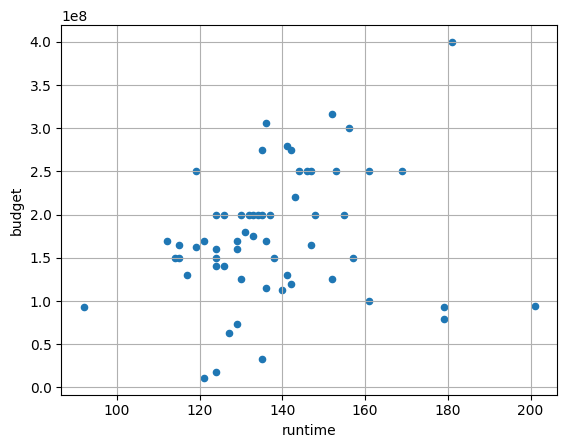

In [ ]:
_ = dfr.plot.scatter(x = "runtime", y = "budget", grid = True)

Dado que la diferencia es importante se realizara una transformación de datos, asi el modelo no ponderará mas a la variable budget frente a runtime

####    Transformación de datos

La normalización se aplicará usando **La escala máxima absoluta**, la cual es más general ya que permite negativos. Además, es aplicable este método ya que en nuestro análisis de valores atípicos y anómalos no estaban presentes en nuestros datos.

In [ ]:

dfr.runtime = dfr.runtime/dfr.runtime.abs().max()

dfr.budget = dfr.budget/dfr.budget.abs().max()

dfr.head()

,voteavg,studio,genre,runtime,budget
0,4.09,Lucasfilm,Action_Adventure_Sci-Fi,0.601990,0.02750
1,4.12,Lucasfilm,Action_Adventure_Sci-Fi,0.616915,0.04500
2,3.98,Lucasfilm,Action_Adventure_Sci-Fi,0.671642,0.08125
3,3.69,Universal Pictures,Adventure_Sci-Fi,0.631841,0.15750
4,3.01,Universal Pictures,Action_Adventure_Sci-Fi,0.641791,0.18250


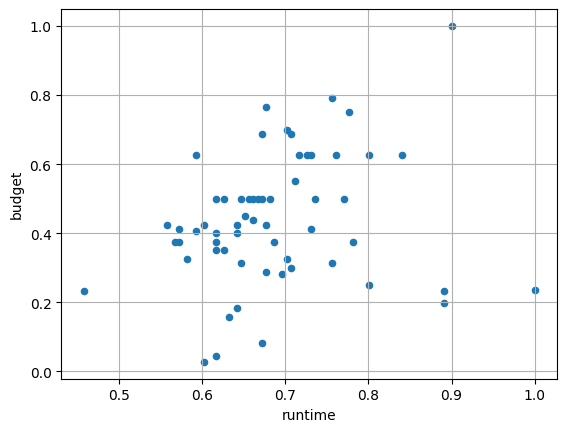

In [ ]:
_ = dfr.plot.scatter(x = "runtime", y = "budget", grid = True)

## Tratamiento de variables categoricas

### Estudio cinematografico

In [ ]:
#Estudios cinematograficos

dfr.studio.unique().tolist()

['Lucasfilm',
 'Universal Pictures',
 'Warner Bros.',
 'WingNut Films',
 'Marvel Studios']

Pero se descartara el estudio con menor cantidad de peliculas en el dataset, ya que para crear las columnas dummy se requiere todos menos 1, la misma aún así sera contemplada cuando todas las variables categoricas contempladas de su misma naturaleza sean 0.

In [ ]:
estudios = dfr.studio.unique().tolist()

estudios.remove('WingNut Films')

#Lo preparamos para una codificación correcta
estudiosM = list(map(lambda x: x.replace(' ', '_').replace('.', ''), estudios))

estudiosM

['Lucasfilm', 'Universal_Pictures', 'Warner_Bros', 'Marvel_Studios']

In [ ]:
#Convertimos las variables categóricas

for i, std in enumerate(estudiosM):
  dfr[std] = 0
  dfr.loc[dfr.studio == estudios[i], std] = 1

dfr

,voteavg,studio,genre,runtime,budget,Lucasfilm,Universal_Pictures,Warner_Bros,Marvel_Studios
0,4.09,Lucasfilm,Action_Adventure_Sci-Fi,0.601990,0.02750,1,0,0,0
1,4.12,Lucasfilm,Action_Adventure_Sci-Fi,0.616915,0.04500,1,0,0,0
2,3.98,Lucasfilm,Action_Adventure_Sci-Fi,0.671642,0.08125,1,0,0,0
3,3.69,Universal Pictures,Adventure_Sci-Fi,0.631841,0.15750,0,1,0,0
4,3.01,Universal Pictures,Action_Adventure_Sci-Fi,0.641791,0.18250,0,1,0,0
5,3.08,Lucasfilm,Action_Adventure_Sci-Fi,0.676617,0.28750,1,0,0,0
6,2.73,Universal Pictures,Action_Adventure_Sci-Fi_Thriller,0.457711,0.23250,0,1,0,0
7,3.69,Warner Bros.,Adventure_Fantasy,0.756219,0.31250,0,0,1,0
8,4.10,WingNut Films,Action_Adventure_Fantasy,0.890547,0.23250,0,0,0,0
9,3.03,Lucasfilm,Action_Adventure_Sci-Fi,0.706468,0.30000,1,0,0,0


### Genero de la pelicula

In [ ]:
#Genero

dfr.genre.unique().tolist()

['Action_Adventure_Sci-Fi',
 'Adventure_Sci-Fi',
 'Action_Adventure_Sci-Fi_Thriller',
 'Adventure_Fantasy',
 'Action_Adventure_Fantasy',
 'Adventure_Family_Fantasy',
 'Adventure_Fantasy_Mystery',
 'Action_Adventure_Drama_Fantasy',
 'Action_Adventure_Fantasy_Sci-Fi',
 'Action_Adventure_Drama_Sci-Fi',
 'Action_Adventure_Comedy_Fantasy_Sci-Fi',
 'Action_Comedy_Fantasy']

Similar al tratamiento de estudios, nos quedaremos con un género menos de los disponibles en particular el de menor cantidad de datos y en caso de iguales, se eliminará el de mayor cantidad de genero ya que son menos comunes.

In [ ]:
generos = dfr.genre.unique().tolist()

generos.remove('Action_Adventure_Comedy_Fantasy_Sci-Fi')
#Lo preparamos para una codificación correcta
generosM = list(map(lambda x: x.replace('-', ''), generos))

generosM

['Action_Adventure_SciFi',
 'Adventure_SciFi',
 'Action_Adventure_SciFi_Thriller',
 'Adventure_Fantasy',
 'Action_Adventure_Fantasy',
 'Adventure_Family_Fantasy',
 'Adventure_Fantasy_Mystery',
 'Action_Adventure_Drama_Fantasy',
 'Action_Adventure_Fantasy_SciFi',
 'Action_Adventure_Drama_SciFi',
 'Action_Comedy_Fantasy']

In [ ]:
# convertimos las variables categóricas

for i, gnr in enumerate(generosM):
  dfr[gnr] = 0
  dfr.loc[dfr.genre == generos[i], gnr] = 1

dfr.head()

,voteavg,studio,genre,runtime,budget,Lucasfilm,Universal_Pictures,Warner_Bros,Marvel_Studios,Action_Adventure_SciFi,Adventure_SciFi,Action_Adventure_SciFi_Thriller,Adventure_Fantasy,Action_Adventure_Fantasy,Adventure_Family_Fantasy,Adventure_Fantasy_Mystery,Action_Adventure_Drama_Fantasy,Action_Adventure_Fantasy_SciFi,Action_Adventure_Drama_SciFi,Action_Comedy_Fantasy
0,4.09,Lucasfilm,Action_Adventure_Sci-Fi,0.601990,0.02750,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,4.12,Lucasfilm,Action_Adventure_Sci-Fi,0.616915,0.04500,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3.98,Lucasfilm,Action_Adventure_Sci-Fi,0.671642,0.08125,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,3.69,Universal Pictures,Adventure_Sci-Fi,0.631841,0.15750,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,3.01,Universal Pictures,Action_Adventure_Sci-Fi,0.641791,0.18250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


## Modelo de varias variables

Acá se procederá a crear la regresión múltiple de varias variables.

In [ ]:
#Seleccionamos las columnas de interes dado que no son muchos los datos disponibles no se realizara una división de entrenamiento y test

f = 'voteavg ~ runtime + budget + ' + ' + '.join(estudiosM + generosM)

mod = smf.ols(formula = f, data = dfr)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                voteavg   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     3.068
Date:                Fri, 07 Jul 2023   Prob (F-statistic):            0.00174
Time:                        05:24:00   Log-Likelihood:               -0.71333
No. Observations:                  60   AIC:                             35.43
Df Residuals:                      43   BIC:                             71.03
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

### Interpretación de los coeficientes

*   La influencia de runtime (Duración) indica que mayor duración mejor valoración.
*   El presupuesto, su coeficiente indica que mayor presupuesto menor valoración.
*   Trabajar con Marvel Studios da una mayor valoración respecto a los otros estudios, ya que al ser el menor negativo resta menos en la estimación de la valoración.
*   En el grupo de géneros, aquellos que dan coeficientes negativos indican que la película no tendrá una buena valoración respecto a los otros grupos de géneros, ya que tiende a disminuir la valoración. En particular se ve que el género Fantasy es común al grupo de los negativos en 7/9; esto a su vez permite inducir que el género Fantasy es muy probable uno de los influyentes en la disminución de la valoración.
*	Adventure_SciFi, es el grupo de género que más razón de cambio tiene sobre los otros generos y permite predecir una posible buena valoración si se trabaja con el mismo.




Aún así debe ser estudiada su significancia, para observar si realmente vale la pena considerar su coeficiente en el modelo.

### Analisis de residuos en variables no categoricas

Cuando graficamos los residuos para los diferentes valores de la variable independiente, los mismos deben presentar una distribución aleatoria, caso contrario si presentan una distribución parabolica por ejemplo, el modelo deber ser revisado ya que para valores extremos digamos que subestima y valores intermedios sobreestima o caso inverso, lo que termina definiendo que no es un buen modelo.

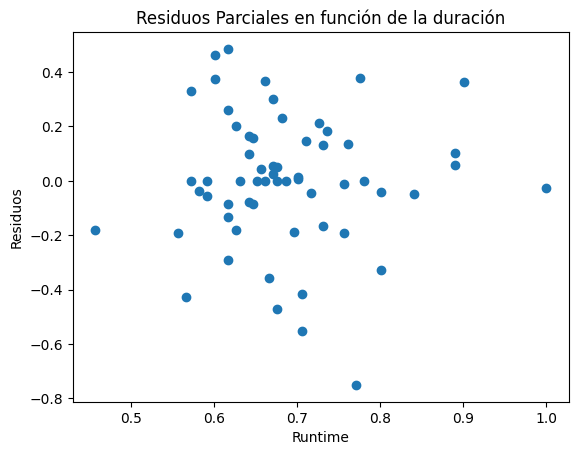

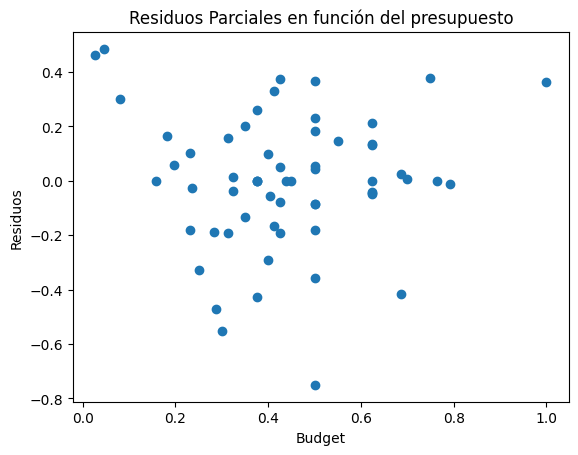

In [ ]:
residuos = res.resid

#Lo graficaremos en función de a una variable independiente

#Duración
vi = dfr.runtime

plt.scatter(vi, residuos)
plt.xlabel('Runtime')
plt.ylabel('Residuos')
plt.title('Residuos Parciales en función de la duración')
plt.show()

#Presupuesto
vi = dfr.budget

plt.scatter(vi, residuos)
plt.xlabel('Budget')
plt.ylabel('Residuos')
plt.title('Residuos Parciales en función del presupuesto')
plt.show()

Se observa que la misma tiene una distribución aleatoria y no hay una conformación de parabola u otra forma.

### R^2 - ajustado

Dado que tenemos mas de una variable independiente usaremos esta metrica. Ya que puede parecernos que el modelo tiene un buen ajuste, pero este no se debe a que se seleccionaron buenas variables sino, a que se incorporaron muchas variables.


In [ ]:

# Calcular la suma de los residuos cuadrados (SSR)
SSR = np.sum(residuos**2)

# Calcular la suma de los cuadrados totales (SST)
mean_value = dfr.voteavg.mean()
SST = np.sum((dfr.voteavg - mean_value)**2)

# Calcular el coeficiente de determinación (R-squared)
R_squared = 1 - SSR/SST

print("Coeficiente de determinación (R-squared):", R_squared)

Coeficiente de determinación (R-squared): 0.5330465449397006


In [ ]:
# Obtener el número de datos en la muestra (n)
n = dfr.shape[0]

# Obtener la cantidad de variables independientes (p)
p = len(res.params) - 1

# Calcular el coeficiente de determinación ajustado (R-squared ajustado)
R_squared_ajustado = 1 - ((1 - R_squared)*(n - 1)/(n - p - 1))

print("Coeficiente de determinación ajustado (R-squared ajustado):", R_squared_ajustado)

Coeficiente de determinación ajustado (R-squared ajustado): 0.3440415750343414


Esto da un valor más cerca de 0 que de 1, por lo que el modelo no explica con mucha precisión la variable dependiente.

## Gráfico del Modelo

Realizamos el gráfico de los valores reales vs las predicciones.

In [ ]:
Y_pred = res.predict()

Y_test = df.voteavg

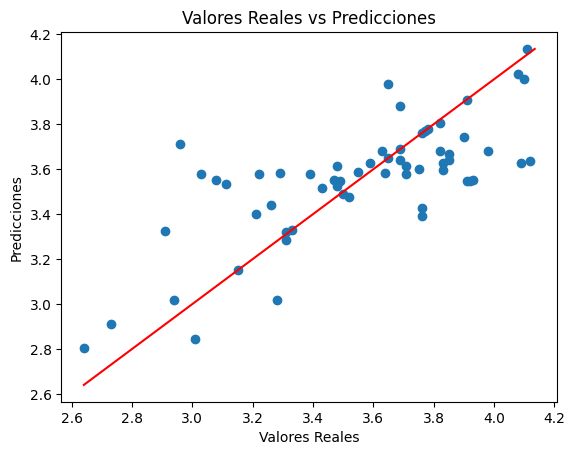

In [ ]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')

diagonal = np.linspace(min(Y_test.min(), Y_pred.min()), max(Y_test.max(), Y_pred.max()))
plt.plot(diagonal, diagonal, '-r')

plt.show()

## Significancia de los coeficientes estimados en el modelo

Se considera que un coeficiente es estadísticamente significativo si su valor P es menor que un umbral predefinido, comúnmente 0.05 (no es restrictivo 100%).

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                voteavg   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     3.068
Date:                Fri, 07 Jul 2023   Prob (F-statistic):            0.00174
Time:                        04:37:42   Log-Likelihood:               -0.71333
No. Observations:                  60   AIC:                             35.43
Df Residuals:                      43   BIC:                             71.03
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

Observando el resumen de la regresión el coeficiente de mayor P es Action_Adventure_SciFi_Thriller, probaremos eliminando primero este coeficiente de la regresión y volveremos a entrenar el modelo.



In [ ]:

generosM.remove("Action_Adventure_SciFi_Thriller")

In [ ]:

f = 'voteavg ~ runtime + budget + ' + ' + '.join(estudiosM + generosM)

mod = smf.ols(formula = f, data = dfr)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                voteavg   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     3.348
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           0.000901
Time:                        04:39:30   Log-Likelihood:               -0.71437
No. Observations:                  60   AIC:                             33.43
Df Residuals:                      44   BIC:                             66.94
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Continuamos eliminando los coeficientes no significativos

In [ ]:
generosM.remove("Adventure_Fantasy_Mystery")

f = 'voteavg ~ runtime + budget + ' + ' + '.join(estudiosM + generosM)

mod = smf.ols(formula = f, data = dfr)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                voteavg   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     3.348
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           0.000901
Time:                        04:41:20   Log-Likelihood:               -0.71437
No. Observations:                  60   AIC:                             33.43
Df Residuals:                      44   BIC:                             66.94
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [ ]:
generosM.remove("Adventure_Fantasy")

f = 'voteavg ~ runtime + budget + ' + ' + '.join(estudiosM + generosM)

mod = smf.ols(formula = f, data = dfr)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                voteavg   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     3.669
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           0.000447
Time:                        04:41:46   Log-Likelihood:               -0.71472
No. Observations:                  60   AIC:                             31.43
Df Residuals:                      45   BIC:                             62.84
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [ ]:
generosM.remove("Action_Adventure_Fantasy_SciFi")

f = 'voteavg ~ runtime + budget + ' + ' + '.join(estudiosM + generosM)

mod = smf.ols(formula = f, data = dfr)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                voteavg   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     4.030
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           0.000216
Time:                        04:42:47   Log-Likelihood:               -0.75123
No. Observations:                  60   AIC:                             29.50
Df Residuals:                      46   BIC:                             58.82
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [ ]:
generosM.remove("Adventure_Family_Fantasy")

f = 'voteavg ~ runtime + budget + ' + ' + '.join(estudiosM + generosM)

mod = smf.ols(formula = f, data = dfr)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                voteavg   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     4.440
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           0.000102
Time:                        04:43:30   Log-Likelihood:               -0.82614
No. Observations:                  60   AIC:                             27.65
Df Residuals:                      47   BIC:                             54.88
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [ ]:
generosM.remove("Action_Adventure_Drama_SciFi")

f = 'voteavg ~ runtime + budget + ' + ' + '.join(estudiosM + generosM)

mod = smf.ols(formula = f, data = dfr)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                voteavg   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     4.887
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           4.96e-05
Time:                        04:45:17   Log-Likelihood:                -1.0178
No. Observations:                  60   AIC:                             26.04
Df Residuals:                      48   BIC:                             51.17
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [ ]:
estudiosM.remove("Marvel_Studios")

f = 'voteavg ~ runtime + budget + ' + ' + '.join(estudiosM + generosM)

mod = smf.ols(formula = f, data = dfr)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                voteavg   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     5.468
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           2.09e-05
Time:                        04:45:49   Log-Likelihood:                -1.0739
No. Observations:                  60   AIC:                             24.15
Df Residuals:                      49   BIC:                             47.19
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

El criterio de 0.05 no es un valor estricto ya que el mismo está en función del contexto del modelo, la cantidad de muestra y el objetivo del análisis.

En nuestro caso por un lado no tenemos una gran muestra de todas las películas de los estudios o de más estudios. El objetivo es la valoración la cual también implica a las personas, lo que implica como fue estructurada la trama, también el contenido de la película y la calidad de efectos de corresponder.

Por lo que nuestro P lo podríamos llevar a un valor aproximado de 0.15 para no ser muy restrictivos.

Si bien hay un estudio que lo supera por poco, podemos desestimarlo.

### R^2 - ajustado con coeficientes actualizados


In [ ]:
residuos = res.resid

In [ ]:
# Calcular la suma de los residuos cuadrados (SSR)
SSR = np.sum(residuos**2)

# Calcular la suma de los cuadrados totales (SST)
mean_value = dfr.voteavg.mean()
SST = np.sum((dfr.voteavg - mean_value)**2)

# Calcular el coeficiente de determinación (R-squared)
R_squared = 1 - SSR/SST

print("Coeficiente de determinación (R-squared):", R_squared)

Coeficiente de determinación (R-squared): 0.4953254397314434


In [ ]:
# Obtener el número de datos en la muestra (n)
n = dfr.shape[0]

# Obtener la cantidad de variables independientes (p)
p = len(res.params) - 1

# Calcular el coeficiente de determinación ajustado (R-squared ajustado)
R_squared_ajustado = 1 - ((1 - R_squared)*(n - 1)/(n - p - 1))

print("Coeficiente de determinación ajustado (R-squared ajustado):", R_squared_ajustado)

Coeficiente de determinación ajustado (R-squared ajustado): 0.41616080282657175


El modelo incremento el valor de R^2 - ajustado por lo que el modelo mejoro en la explicación de la variable dependiente.

## Gráfico del Modelo con coeficientes eliminados

Realizamos el gráfico de los valores reales vs las predicciones.

In [ ]:
Y_pred = res.predict()

Y_test = df.voteavg

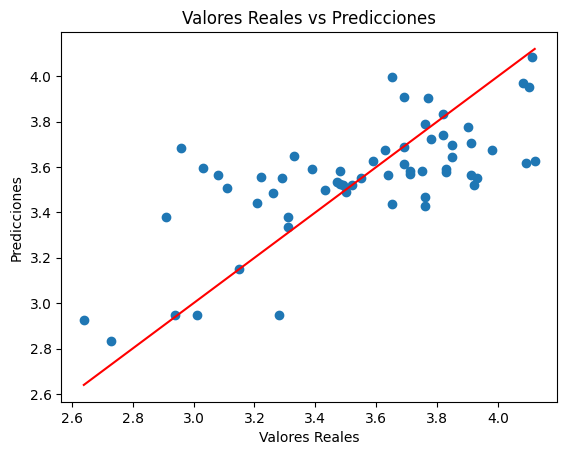

In [ ]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')

diagonal = np.linspace(min(Y_test.min(), Y_pred.min()), max(Y_test.max(), Y_pred.max()))
plt.plot(diagonal, diagonal, '-r')

plt.show()

#CONCLUSIONES

El modelo no llega a demostrar a dar una confiabilidad en estimación de la variable dependiente dado que la significancia de los coeficientes relacionado con p-value se tuvo que llevar a un valor de 15% aproximadamente.

Por otro lado, el Adj. R-squared: 0.431; no da un valor satisfactorio por lo que el modelo no va a predecir correctamente a la variable dependiente.

Se podría seguir eliminando dummys, pero podría empeorar la significancia, como paso con warnerbros; que al ser eliminado duplico el p-value de dos variables.

El modelo podría ser mejorado con más datos u otras variables como encuestas de cuantas personas esperan el estreno o número de seguidores en las redes sociales de las películas a estrenar.

A modo de explorar de otras formas se podría jugar un poco con los géneros, ya que había muchos, un ejemplo sería los que incluyen fantasy y los que no; y a partir de ahí crear el modelo y volver a tratarlo como anteriormente lo hicimos.